# Linked List

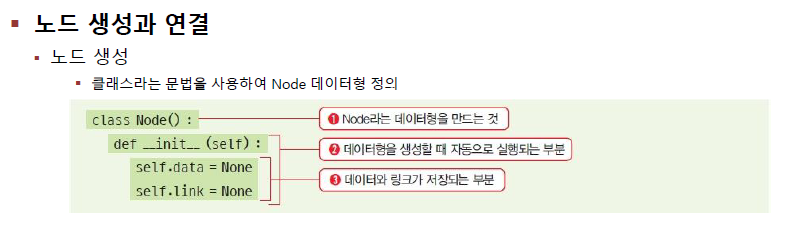

In [1]:
class Node():
    def __init__(self):
        self.data = None
        self.link = None

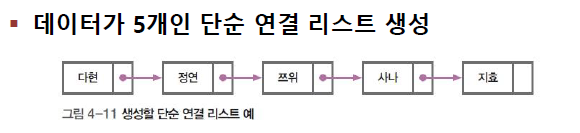

In [22]:
node1 = Node()
node1.data = '다현'

In [23]:
node2 = Node()
node2.data = '정연'
node1.link = node2        # 다현의 link가 node2 객체에 연결되어 있음

In [24]:
node3 = Node()
node3.data = '쯔위'
node2.link = node3

In [25]:
node4 = Node()
node4.data = '사나'
node3.link = node4

In [26]:
node5 = Node()
node5.data = '지효'
node4.link = node5    # node5의 link가 없다는 것: node5가 맨 마지막에 위치한다는 것

In [13]:
# 맨 처음 data값만 알면 모든 data를 추적할 수 있다!
print(node1.data)
print(node1.link.data)
print(node1.link.link.data)
print(node1.link.link.link.data)
print(node1.link.link.link.link.data)

다현
정연
쯔위
사나
지효


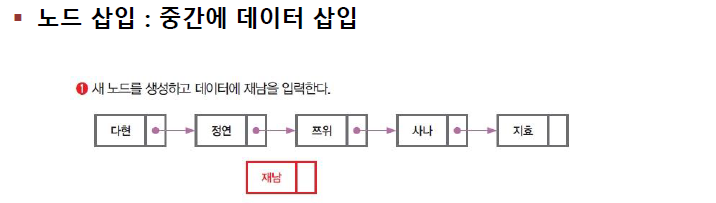

In [16]:
newNode = Node()
newNode.data = '재남'
newNode.link = node2.link    # 현재 node2의 link가 newNode의 link로 지정됨
node2.link = newNode          # node2의 link의 위치를 바꿔줌

In [20]:
print(node1.data)
print(node1.link.data)
print(node1.link.link.data)
print(node1.link.link.link.data)
print(node1.link.link.link.link.data)
print(node1.link.link.link.link.link.data)

다현
정연
재남
쯔위
사나
지효


In [21]:
# 출력문 코드를 간단하게
current = node1
print(current.data)
while current.link != None:
    current = current.link     # 연결된 노드가 다시 current가 된다
    print(current.data)

다현
정연
재남
쯔위
사나
지효


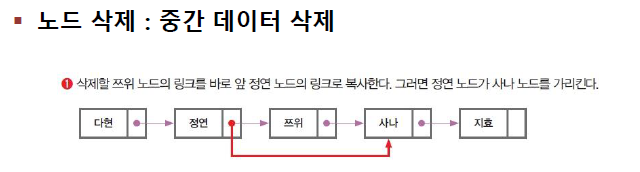

다시 '재남'이 없는 노드를 만들고 시작하기

In [42]:
node1 = Node()
node1.data = '다현'

In [43]:
node2 = Node()
node2.data = '정연'
node1.link = node2        # 다현의 link가 node2 객체에 연결되어 있음

In [44]:
node3 = Node()
node3.data = '쯔위'
node2.link = node3

In [45]:
node4 = Node()
node4.data = '사나'
node3.link = node4

In [46]:
node5 = Node()
node5.data = '지효'
node4.link = node5    # node5의 link가 없다는 것: node5가 맨 마지막에 위치한다는 것

In [47]:
# 2의 위치를 삭제하기
node2.link = node3.link      # node3에 연결된 노드를 node2에 연결
del node3                # 객체3을 지운다

> node3을 먼저 삭제해버리면 node3의 link 정보도 사라져버려서 안됨!

In [48]:
current = node1
print(current.data)
while current.link != None:
    current = current.link     # 연결된 노드가 다시 current가 된다
    print(current.data)

다현
정연
사나
지효


## 단순 연결리스트의 일반적 구현

In [141]:
# 함수 선언 부분
class Node():
    def __init__(self):
        self.data = None
        self.link = None
        
def printNodes(start):      # 출력 함수
    current = start          # start: 시작 노드
    print(current.data)
    while current.link != None:
        current = current.link
        print(current.data)

# 1. 노드 삽입
def insert_node(findData, insertData):   # findData: 삽입할 위치의 데이터, insertData: 삽입할 데이터
    global memory, head, pre, current    # 전역 변수로 쓰이도록 지정
    # 1. 제일 앞에 노드 삽입
    if head.data == findData:      
        node = Node()
        node.data = insertData
        node.link = head            # head가 가리키는 첫 노드를 새 node가 가르키도록 함
        head = node          # head가 가리키는 노드를 node로 바꿈
        return

    # 2. 중간에 노드 삽입
    current = head
    while current.link != None:
        pre = current
        current = current.link
        if current.data == findData:
            node = Node()
            node.data = insertData
            node.link = current
            pre.link = node
            return
        
    # 3. 삽입 위치가 리스트에 없는 경우 제일 마지막에 노드 삽입
    node = Node()
    node.data = insertData
    current.link = node
        

# 2. 노드 삭제
def delete_node(deleteData):   # deleteData: 지울 데이터
    global memory, head, pre, current
    # 삭제하려는 데이터가 첫번째 노드인 경우
    if head.data == deleteData:
        current = head    # head 옮겨가기 전에 재사용 가능하도록 지정
        head = head.link
        del current
        return
    
    current = head
    while current.link != None:
        pre = current
        current = current.link
        if current.data == deleteData:
            pre.link = current.link    # link 먼저 연결하고 데이터 삭제
            del current
            return

    # 지울 데이터와 매치되는 데이터를 찾지 못하면 안지우면 된다!
    print('해당 데이터가 없습니다.')


# 3. 노드 검색
def find_node(findData):
    global memory, head, pre, current  
    # 첫번째 데이터가 찾는 데이터인 경우
    current = head
    if current.data == findData:
        return current
    
    # 찾는 데이터가 중간에 있는 경우
    while current.link != None:
        pre = current         # 재사용 할일이 없으므로 pre 지정 안해도 됨
        current = current.link
        if current.data == findData:
            return current
        
    # 찾는 데이터가 없는 경우
    print('찾는 데이터를 가진 노드가 없습니다.')
    return Node()    
    # find_data를 사용할 때 반환된node객체.data값을 출력하기 때문에, 빈 노드객체를 지정하지 않으면 오류난다



# 전역 변수 부분
memory = []     # 노드 저장용
head, pre, current = None, None, None
dataArray = ['다현', '정연', '쯔위', '사나', '지효']   # DB나 크롤링에서 읽어온 데이터를 넣을 수 있다


# 메인 코드 부분
if __name__ == '__main__':
    # 기본 노드 만들어서 default data 입력
    # 1. 빈 노드에 데이터를 입력
    node = Node()
    node.data = dataArray[0]
    # 2. 첫번째 노드를 head로 지정
    head = node
    # 3. 현재 노드 객체를 메모리에 넣음
    memory.append(node)

    # 두번째 노드부터는 반복문으로 해결
    for data in dataArray[1:]:
        # 이전 노드 정보를 잠시 후 재사용 해야 하므로 pre로 지정
        pre = node
        # 빈 노드 만들어서 데이터 입력
        node = Node()
        node.data = data
        # 이전 노드의 링크를 새 노드에 연결
        pre.link = node
        # 새 노드도 메모리에 저장
        memory.append(node)

    # 만들어진 노드 출력
    printNodes(head)

다현
정연
쯔위
사나
지효


> `head`, `pre`, `current`를 지정하는 이유: `node`라는 변수의 값이 계속 바뀌기 때문에 기존 node값을 다른 변수에 넣어줘야 한다.

## 노드 삽입

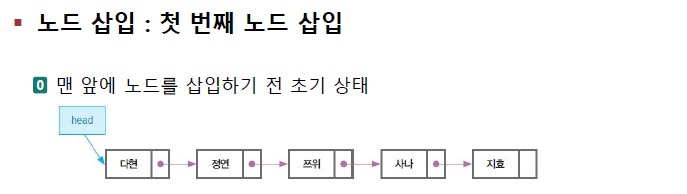

In [142]:
# 다현 앞에 화사 지정
insert_node('다현', '화사')
printNodes(head)

화사
다현
정연
쯔위
사나
지효


* **중간에 노드 삽입**
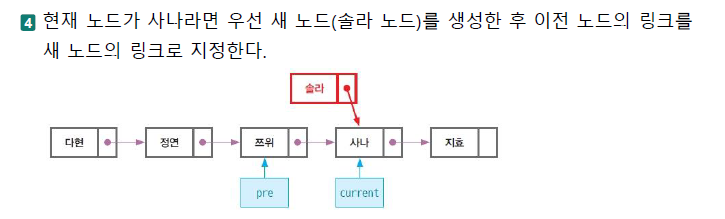

In [143]:
insert_node('사나', '솔라')
printNodes(head)

화사
다현
정연
쯔위
솔라
사나
지효


* **(찾는 위치가 없어서) 마지막에 노드 삽입**
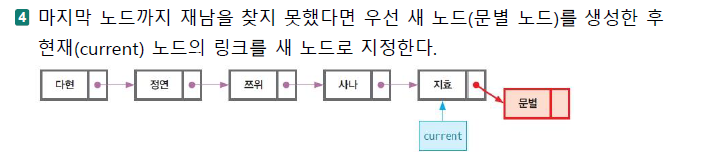

In [144]:
insert_node('재남', '문별')
printNodes(head)

화사
다현
정연
쯔위
솔라
사나
지효
문별


## 노드 삭제

* **노드 삭제하기**

In [145]:
delete_node('화사')
printNodes(head)

다현
정연
쯔위
솔라
사나
지효
문별


In [146]:
delete_node('쯔위')
printNodes(head)

다현
정연
솔라
사나
지효
문별


In [147]:
# 없는 데이터를 지우려고 한다면?
delete_node('재남')

해당 데이터가 없습니다.


## 노드 검색

* **노드 검색**
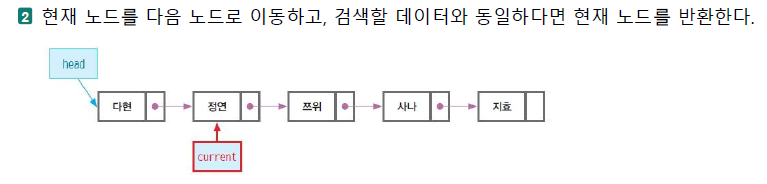

In [148]:
# 노드 객체만 찾으면 별다른 정보가 없기 때문에 data를 출력
find_node('다현').data

'다현'

In [149]:
find_node('정연').data

'정연'

In [158]:
find_node('재남').data
type(find_node('재남').data)

찾는 데이터를 가진 노드가 없습니다.
찾는 데이터를 가진 노드가 없습니다.


NoneType

## 프록그램 만들기

In [161]:
select = -1    # 변수 초기화

while select != 4:
    select = int(input('1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료'))
    if select == 1:
        findData = input('입력하려는 위치의 노드 데이터')
        insertData = input('추가하려는 노드의 데이터')
        insert_node(findData, insertData)
        printNodes(head)
    
    elif select == 2:
        deleteDate = input('삭제하려는 데이터')
        delete_node(deleteDate)
        printNodes(head)
    
    elif select == 3:
        findData = input('찾는 데이터')
        print(find_node(findData).data)
        
    elif select ==4:
        continue 
        
    else:
        print('올바른 숫자를 입력해주세요.')

1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료1
입력하려는 위치의 노드 데이터다현
추가하려는 노드의 데이터재남
재남
다현
정연
솔라
사나
지효
문별
1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료2
삭제하려는 데이터재남
다현
정연
솔라
사나
지효
문별
1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료3
찾는 데이터재남
찾는 데이터를 가진 노드가 없습니다.
None
1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료3
찾는 데이터문별
문별
1: 노드 삽입, 2: 노드 삭제, 3: 노드 찾기, 4: 종료4
올바른 숫자를 입력해주세요.
